In [113]:
import pandas as pd 
import requests
from matplotlib import pyplot as plt
import numpy as np
import json 

# API call for original request
# r = requests.get(f'https://api.opendota.com/api/players/80034246/recentMatches').json()

#Saving file for use with this project only
# with open('matchData0721.json', 'w') as file:
#     json.dump(r, file, indent=4)

#Opening file to turn into dataframe
data = pd.read_json('matchData0721.json')
df = pd.DataFrame(data)
df

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,...,hero_damage,tower_damage,hero_healing,last_hits,lane,lane_role,is_roaming,cluster,leaver_status,party_size
0,6087501055,130,True,2400,22,7,108,2021-07-14 02:00:52,21.0,1,...,18482,502,185,135,1.0,3.0,0.0,122,0,1.0
1,6086028330,129,False,2276,22,7,108,2021-07-13 01:10:08,21.0,6,...,16346,6151,1709,127,1.0,3.0,0.0,123,0,2.0
2,6084649098,130,True,2003,22,7,129,2021-07-12 02:39:41,21.0,1,...,8820,0,0,94,1.0,3.0,0.0,122,0,2.0
3,6084413731,0,False,3494,22,7,81,2021-07-11 20:55:13,21.0,8,...,27561,6410,0,303,1.0,1.0,0.0,121,0,3.0
4,6084359995,132,True,2324,22,7,67,2021-07-11 19:56:45,21.0,4,...,21983,0,0,130,3.0,1.0,0.0,121,0,3.0
5,6084321153,132,True,1063,19,12,72,2021-07-11 19:17:29,NaN,2,...,10713,298,0,83,NaN,NaN,NaN,122,0,NaN
6,6082963561,130,True,899,19,12,72,2021-07-11 02:32:14,NaN,11,...,14131,4249,0,120,NaN,NaN,NaN,122,0,NaN
7,6081400779,130,False,3376,22,0,81,2021-07-10 03:14:12,21.0,6,...,21833,3345,0,380,3.0,1.0,0.0,122,0,5.0
8,6081369031,2,False,1038,19,12,22,2021-07-10 02:38:13,NaN,4,...,17419,114,0,52,NaN,NaN,NaN,122,0,NaN
9,6081345532,131,True,1207,19,12,114,2021-07-10 02:09:02,NaN,4,...,8678,0,0,31,NaN,NaN,NaN,123,0,NaN


In [114]:
# Cleaning data
df.drop(['player_slot', 'radiant_win', 'game_mode', 'lobby_type', 'version', 'is_roaming', 'cluster', 'leaver_status', 'party_size', 'start_time', 'lane', 'lane_role', 'skill'], axis=1, inplace=True)
df.drop([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], inplace=True)
df.replace({
    'hero_id' : {
        108 : 'Underlord',
        129 : 'Mars',
        81 : 'Chaos Knight',
        67 : 'Spectre',
        72 : 'Gyrocopter',
        22 : 'Zeus',
        114 : 'Monkey king' 
    }
}, inplace=True)

In [115]:
df

,match_id,duration,hero_id,kills,deaths,assists,xp_per_min,gold_per_min,hero_damage,tower_damage,hero_healing,last_hits
0,6087501055,2400,Underlord,1,5,6,453,310,18482,502,185,135
1,6086028330,2276,Underlord,6,3,17,571,422,16346,6151,1709,127
2,6084649098,2003,Mars,1,12,6,276,258,8820,0,0,94
3,6084413731,3494,Chaos Knight,8,7,9,679,486,27561,6410,0,303
4,6084359995,2324,Spectre,4,9,14,496,339,21983,0,0,130
5,6084321153,1063,Gyrocopter,2,9,1,852,742,10713,298,0,83
6,6082963561,899,Gyrocopter,11,6,5,876,1008,14131,4249,0,120
7,6081400779,3376,Chaos Knight,6,11,15,647,539,21833,3345,0,380
8,6081369031,1038,Zeus,4,6,16,877,777,17419,114,0,52
9,6081345532,1207,Monkey king,4,10,3,1061,762,8678,0,0,31


In [116]:
match_length = round(df['duration'] / 60)

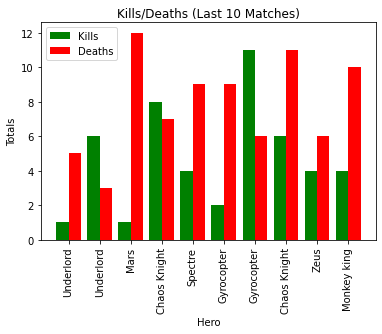

In [117]:
fig, ax = plt.subplots()
x_axis = np.arange(len(df['hero_id']))
# ax.bar(df['hero_id'], df['kills'], color = 'green')
ax.bar(x_axis - 0.2, df['kills'], 0.4, label="Kills", color="green")
ax.bar(x_axis + 0.2, df['deaths'], 0.4, label="Deaths", color="red")
plt.xticks(x_axis, df['hero_id'], rotation=90)
plt.ylabel('Totals')
plt.xlabel('Hero')
plt.title('Kills/Deaths (Last 10 Matches)')
ax.legend(loc = 'upper left')
plt.show()

<BarContainer object of 10 artists>

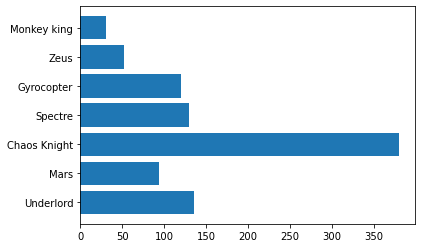

In [121]:
plt.barh(df['hero_id'], df['last_hits'])